# Concha Lab Project

## The first Part of Project, analysing different machin learning methods

### -- For this part, I cleaned the data, and I was looking for the right algorithm to predict 4 outputs based on our data for three gains.
### -- I tried Random forest, as a Bagging method, SVR regressor, Gradient Boosting Regressor as Boosting method, and KNN.

### In first part, I tuned Random Forest model with different hyperparameters, and compared three different methods based on Random Forest base algorithm to see the  difference between these models.
### There was not significant difference between these three methods based on using data.

### After using all these methods, I tried different approch to increse the accuracy of the model and then use it for final model.

In [18]:
# importing some useful libraries for the first part of project
import numpy as np
import scipy
import pandas as pd
import math
import random
import pickle
import seaborn as sns

from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
# Load the data from local computer, and drop redundant features.
df = pd.read_csv('Paper3_WebData_Final.csv')
df = df.drop(['test_date','nid','gender','naics', 'age_group','region','NAICS_descr'], axis=1)
df_L = df.drop(['R500k','R1k','R2k','R3k', 'R4k', 'R6k', 'R8k'], axis=1)
df_R = df.drop(['L500k','L1k','L2k','L3k', 'L4k', 'L6k', 'L8k'], axis=1)

# Seperating left and right ears data so that we could use them for creating model.
df_L.columns = ['500k','1k','2k','3k', '4k', '6k', '8k']
df_R.columns = ['500k','1k','2k','3k', '4k', '6k', '8k']
data = pd.concat([df_L, df_R], axis=0)

C:\Users\gjaha\anaconda3\envs\cv\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# cleaning data, removing nan values, and '**', and converting object type to int.
data.isnull().sum()/data.shape[0]
data = data.replace('**',np.nan)
data = data.dropna()
data.isnull().sum()
data=data.astype(int)

In [39]:
# desciption of data
data.describe()

,500k,1k,2k,3k,4k,6k,8k
count,1.029866e+06,1.029866e+06,1.029866e+06,1.029866e+06,1.029866e+06,1.029866e+06,1.029866e+06
mean,1.274453e+01,1.320948e+01,1.938259e+01,3.027640e+01,3.766594e+01,3.925810e+01,4.063962e+01
std,9.544690e+00,1.081701e+01,1.521308e+01,1.969767e+01,2.109007e+01,2.182581e+01,2.739760e+01
min,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,5.000000e+00,5.000000e+00,1.000000e+01,1.500000e+01,2.000000e+01,2.000000e+01,2.000000e+01
50%,1.000000e+01,1.000000e+01,1.500000e+01,2.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
75%,1.500000e+01,2.000000e+01,2.500000e+01,4.500000e+01,5.500000e+01,5.500000e+01,6.000000e+01
max,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01


In [40]:
# Prints out all the unique values for each of the columns.
print("Unique input values")
for col in inputs:
    print(inputs[col].unique())
    
print()

print("Unique output values")
for col in outputs:
    print(outputs[col].unique())

Unique input values
[ 5 20 15 30 35 10  0 25 50 45 55 40 65 70 60 80 90 95 75 -5 85 -1  9 49
 26  6 21  1  2 96 97 98 99 94 16  3  7 67 29]
[10  5 15 20 35 40 25 80 45 60 50 55  0 30 65 70 75 90 85 95 -5 19  4  7
 18 36  3 28 58 26 42 29 74 54 96 97 99 98 94  2 92 -1  6 24 38 43 27  8
 16 32 83]
[ 5 10 20 15 25 60 70 90 35 55  0 75 45 30 40 65 50 80 85 95 -5 22  1 13
 49 44 14 57  8 97 96 99 98 94  6 92 -1  4 38 61 54 26 27 62 41 51  2]

Unique output values
[10 15  5 25 20  0 30 35 45 40 70 50 55 90 80 65 60 75 85 95 -1 -5  1  7
  8 12 16  6 28  9 96 97 98 99 94  4  3 24 14 13]
[ 5 10 20 15 25  0 40 35 30 50 45 70 55 60 90 65 80 75 95 -1 85 -5  9  4
  1 11 13 21  2  8 96 97 98 99 94 19 31  3 27 12]
[15 20 30 25 60 40 45 10  5 55 35 50  0 70 65 75 85 80 90 95 -5 -1  4  1
 61 48  9 18 52 27 71 96 97 99 98 94  6 39 92 56  2 29  8 22 62 17]
[25  0 15 45 50 85 20  5 35 10 30 75 55 40 60 80 70 65 90 95 -5  6  2 79
 21 18  9 28 49 37 32 63 16  3 97 96 98 99 94 92 -1 26  4 71 12  7 76 53
 67 

In [41]:
# Look at the unique values for each column
print("Unique input values")
for col in data:
    print(data[col].value_counts())

Unique input values
 10    260098
 5     207589
 15    207297
 20    122235
 0     104449
 25     62526
 30     29458
 35     13570
 40      7697
 45      4820
 50      2836
 55      1850
-5       1570
 60      1356
 65       861
 70       521
 75       326
 80       258
-1        178
 85       133
 90       107
 99        35
 95        30
 96        24
 8          6
 97         6
 7          5
 98         5
 1          4
 6          3
 4          2
 94         2
 9          2
 12         1
 13         1
 14         1
 16         1
 3          1
 28         1
 24         1
Name: 500k, dtype: int64
 10    236900
 5     218137
 15    185714
 20    122576
 0     114377
 25     62833
 30     33169
 35     18365
 40     11140
 45      8108
 50      5492
 55      3692
-5       2735
 60      2332
 65      1407
 70       936
 75       553
 80       418
-1        371
 85       247
 90       194
 99        55
 95        49
 96        25
 4          7
 97         6
 98         6
 1          5
 2 

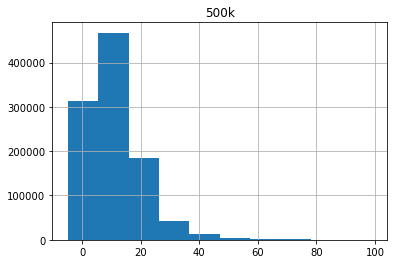

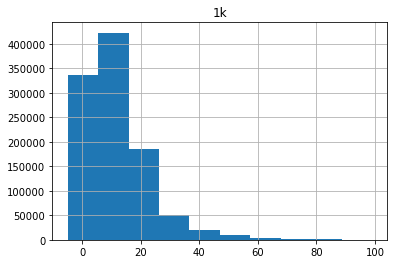

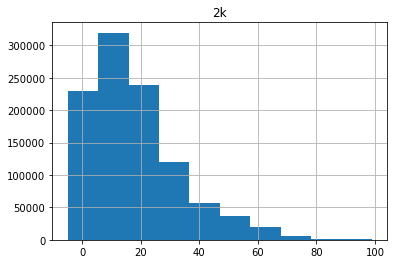

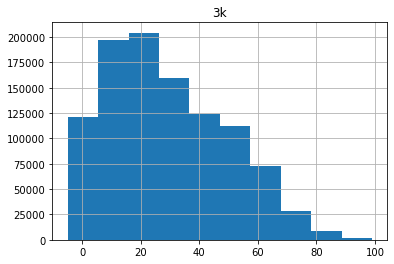

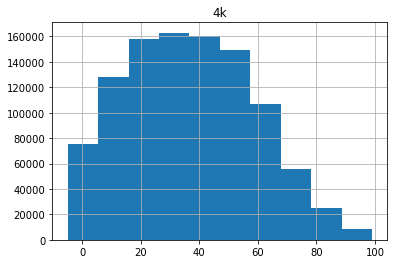

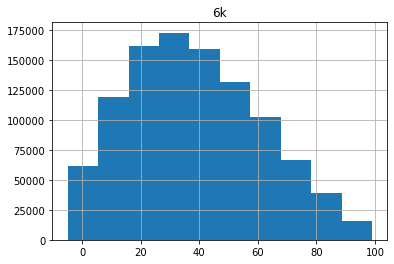

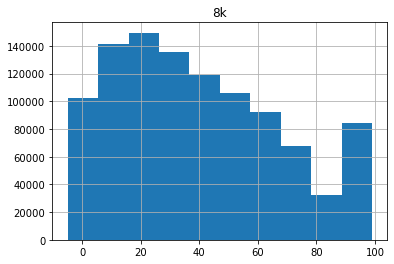

In [42]:
# Distribuation of samples for each column
for col in data:
    data.hist(column=col)

,500k,1k,2k,3k,4k,6k,8k
500k,1.000000,0.759714,0.500383,0.262650,0.182404,0.207669,0.175852
1k,0.759714,1.000000,0.652560,0.338588,0.238134,0.249641,0.206952
2k,0.500383,0.652560,1.000000,0.592633,0.411922,0.366339,0.270308
3k,0.262650,0.338588,0.592633,1.000000,0.757014,0.562618,0.351380
4k,0.182404,0.238134,0.411922,0.757014,1.000000,0.693777,0.415482
6k,0.207669,0.249641,0.366339,0.562618,0.693777,1.000000,0.574710
8k,0.175852,0.206952,0.270308,0.351380,0.415482,0.574710,1.000000


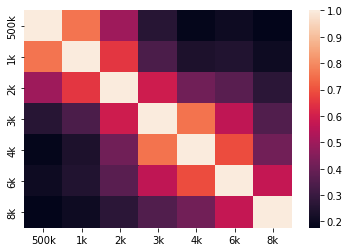

In [43]:
# looking at correlation between variables
sns.heatmap(data.corr())
data.corr()

### Based on above plot, I decided to first predict 3k, and then 8k, 1k, and 500k for RegressorChain model

In [21]:
# drop the duplicate data
data =data.drop_duplicates()

In [22]:
# seperating data for train, and test, based on three inputs, and 4 outputs
inputs = data.loc[:,["2k", "4k", "6k"]]
outputs = data.loc[:,["500k", "1k", "3k", "8k"]]
#Generate train and test datasets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.20, random_state=42)

In [23]:
# converting pandas dataframe to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Random Forest

### The first model I implement for this dataset, is Random Forest. Since Random Forest could predict multi output, I will try to find the best paramter for simple Random Forest, and then use them to build a model with simple random forest, and using MultiOutputRegressor, and RegressorChain.


### The MultiOutputRegressor predicts each output step by step, however RegressorChain use the previous output and use it to predict for next output 

In [ ]:
#List Hyperparameters that we want to tune.

para_grids = {
            'max_depth': [10, 20, 50, 70, 80, 100, None],
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

regr_rf = RandomForestRegressor()
clf = GridSearchCV(regr_rf, para_grids, cv=3)
model = clf.fit(X_train, y_train)

In [25]:
#Print The value of best Hyperparameters
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best n_estimators:', model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best bootstrap:', model.best_estimator_.get_params()['bootstrap'])

Best max_depth: 10
Best n_estimators: 100
Best max_features: log2
Best bootstrap: True


In [29]:
# After finding best hyperparamters for RF, we compare three models, based on Random Forest, base estimator.
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=10, max_features='log2', bootstrap=True)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='log2', bootstrap=True)
regr_rf.fit(X_train, y_train)

regr_multirf_chain = RegressorChain(base_estimator=regr_rf, order=[2, 3, 1, 0])
regr_multirf_chain.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=10,
                                                    max_features='log2'),
               order=[2, 3, 1, 0])

In [30]:
# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)
y_rf_chain = regr_multirf_chain.predict(X_test)

In [31]:
# Evaluate the regressor for three models
mse_one = mean_squared_error(y_test[:,0], y_rf[:,0])
mse_two = mean_squared_error(y_test[:,1], y_rf[:,1])
mse_three = mean_squared_error(y_test[:,2], y_rf[:,2])
mse_four = mean_squared_error(y_test[:,3], y_rf[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_rf[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_rf[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_rf[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_rf[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')
print()
mse_one = mean_squared_error(y_test[:,0], y_multirf[:,0])
mse_two = mean_squared_error(y_test[:,1], y_multirf[:,1])
mse_three = mean_squared_error(y_test[:,2], y_multirf[:,2])
mse_four = mean_squared_error(y_test[:,3], y_multirf[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_multirf[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_multirf[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_multirf[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_multirf[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')
print()
mse_one = mean_squared_error(y_test[:,0], y_rf_chain[:,0])
mse_two = mean_squared_error(y_test[:,1], y_rf_chain[:,1])
mse_three = mean_squared_error(y_test[:,2], y_rf_chain[:,2])
mse_four = mean_squared_error(y_test[:,3], y_rf_chain[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_rf_chain[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_rf_chain[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_rf_chain[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_rf_chain[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')

MSE for first regressor: 65.76038184939344 - second regressor: 64.2380234592656 - third regressor: 124.29559504479842 -       fourth regressor: 481.98858687911803
MAE for first regressor: 6.23889122269855 - second regressor: 6.104907205009603 - third regressor: 8.780404169048035 -       fourth regressor: 15.809037274020664

MSE for first regressor: 65.80632744643154 - second regressor: 64.33467740217132 - third regressor: 124.34169897007344 -       fourth regressor: 482.334677680068
MAE for first regressor: 6.235854901813351 - second regressor: 6.104123216688307 - third regressor: 8.782517435366811 -       fourth regressor: 15.843165057183077
MSE for first regressor: 66.68974552556769 - second regressor: 64.5632144260459 - third regressor: 124.28936506933842 -       fourth regressor: 482.03934443981507
MAE for first regressor: 6.287060987024394 - second regressor: 6.107578171775029 - third regressor: 8.778494952560665 -       fourth regressor: 15.887503755001585


#### I will not tune the model for other algorithms, since all of them have aproximately same MAE.

## SVR regressor

In [33]:
#I will use regressorchain here
from sklearn.linear_model import SGDRegressor
# Create the SVR regressor
svr = SGDRegressor()

# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)
mor.fit(X_train, y_train)

mor_chain = RegressorChain(base_estimator=svr, order=[2, 3, 1, 0])
mor_chain.fit(X_train, y_train)

RegressorChain(base_estimator=SGDRegressor(), order=[2, 3, 1, 0])

In [34]:
# Generate predictions for testing data
y_pred = mor.predict(X_test)

y_pred_chain = mor_chain.predict(X_test)

In [35]:
# Evaluate the regressor for the Multioutput Regressor
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred[:,2])
mse_four = mean_squared_error(y_test[:,3], y_pred[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_pred[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')

MSE for first regressor: 68.76817997089732 - second regressor: 68.58937375677453 - third regressor: 132.8749531188897 -       fourth regressor: 557.6895728812348
MAE for first regressor: 6.351031621812353 - second regressor: 6.2916678980673915 - third regressor: 9.07100104355911 -       fourth regressor: 17.771535115118116


In [36]:
# Evaluate the regressor for the regressorchain
mse_one = mean_squared_error(y_test[:,0], y_pred_chain[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred_chain[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred_chain[:,2])
mse_four = mean_squared_error(y_test[:,3], y_pred_chain[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_pred_chain[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred_chain[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred_chain[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_pred_chain[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')

MSE for first regressor: 83.57616932847408 - second regressor: 72.37877174746119 - third regressor: 223.04229832086176 -       fourth regressor: 785.062282240609
MAE for first regressor: 6.991559490859963 - second regressor: 6.507876878797069 - third regressor: 11.904751649991834 -       fourth regressor: 23.094793584209505


## Gradient Boosting Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=0)
chain = RegressorChain(base_estimator=GBR, order=[2, 3, 1, 0])
chain.fit(X_train, y_train)

RegressorChain(base_estimator=GradientBoostingRegressor(random_state=0),
               order=[2, 3, 1, 0])

In [ ]:
# Generate predictions for testing data
y_pred = chain.predict(X_test)

In [38]:
# Evaluate the regressor
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred[:,2])
mse_four = mean_squared_error(y_test[:,3], y_pred[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_pred[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')

MSE for first regressor: 68.76817997089732 - second regressor: 68.58937375677453 - third regressor: 132.8749531188897 -       fourth regressor: 557.6895728812348
MAE for first regressor: 6.351031621812353 - second regressor: 6.2916678980673915 - third regressor: 9.07100104355911 -       fourth regressor: 17.771535115118116


## KNN with tuning hyper paramters and comparing two models based on KNN algorithm, KNeighborsRegressor and RegressorChain

In [9]:
from sklearn.neighbors import KNeighborsRegressor
#List Hyperparameters that we want to tune.
grid_params = { 'n_neighbors' : [3,5,7,9,11,13],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_2 = KNeighborsRegressor()
clf = GridSearchCV(knn_2, grid_params, cv=3)
model = clf.fit(X_train, y_train)

In [13]:
#Print The value of best Hyperparameters
print('Best n_neighbors:', clf.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', clf.best_estimator_.get_params()['weights'])
print('Best metric:', clf.best_estimator_.get_params()['metric'])

Best n_neighbors: 13
Best weights: uniform
Best metric: manhattan


In [16]:
knn_2 = KNeighborsRegressor(n_neighbors=13, weights= 'uniform', metric='manhattan')

chain2 = RegressorChain(base_estimator=knn_2, order=[2, 3, 1, 0]).fit(X_train, y_train)
#Fit the model
y_pred = chain2.predict(X_test)

In [17]:
# Evaluate the knnregressor with best parameters
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred[:,2])
mse_four = mean_squared_error(y_test[:,3], y_pred[:,3])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two} - third regressor: {mse_three} - \
      fourth regressor: {mse_four}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred[:,2])
mae_four = mean_absolute_error(y_test[:,3], y_pred[:,3])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two} - third regressor: {mae_three} - \
      fourth regressor: {mae_four}')

MSE for first regressor: 70.62096201261225 - second regressor: 68.70606645188687 - third regressor: 133.45473404668817 -       fourth regressor: 523.5212742712456
MAE for first regressor: 6.435302513909521 - second regressor: 6.278144515625946 - third regressor: 9.057049396077625 -       fourth regressor: 16.809374745580286
